# NLP Project Part B: News Article Classification

## 1. Introduction
This notebook focuses on building a classification model to categorize news articles. This part covers data collection/loading, preprocessing, feature extraction, model development, and evaluation for multi-class classification.

## 2. Library Imports

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # If using lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt') # For tokenization if not using .split()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 3. Data Collection and Preprocessing
This section loads the dataset, cleans it by removing unnecessary columns, combines relevant text fields, and applies text preprocessing techniques.

In [11]:
# Load the dataset
df = pd.read_excel('data_news.xlsx')
# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'links', 'keywords'], errors='ignore')
print("\nDataFrame after dropping columns:")
print(df.head())

# Combine 'headline' and 'short_description' into a single 'text' column
df['text'] = df['headline'] + " " + df['short_description']
print("\nDataFrame with combined 'text' column:")
print(df[['headline', 'short_description', 'text']].head())

# Check for missing values in the new 'text' column
print("\nMissing values in 'text' column:")
print(df['text'].isnull().sum())

# Handle missing values if any (e.g., fill with empty string)
df['text'] = df['text'].fillna('')

# Analyze category distribution
print("\nCategory Distribution:")
print(df['category'].value_counts())

# Text preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text_news(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and numbers
    words = text.split() # Tokenize
    words = [word for word in words if word not in stop_words] # Remove stopwords
    return ' '.join(words)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text_news)

# Display a sample of cleaned text
print("\nSample Cleaned News Articles:")
print(df[['text', 'cleaned_text']].head())

First 5 rows of the dataset:
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you wan

## 4. Feature Extraction
This section converts the cleaned text into numerical features using TF-IDF.

In [16]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000) # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['category']

# Display shapes of features and target
print(f"\nShape of TF-IDF features: {X.shape}")
print(f"Shape of target variable: {y.shape}")


Shape of TF-IDF features: (50000, 10000)
Shape of target variable: (50000,)


## 5. Model Development and Training
Here, we split the data, train multiple classification models, and make predictions for news article categorization.

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify for balanced classes

print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

# Train Logistic Regression Model
print("\nTraining Logistic Regression Model...")
lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Model Trained.")

# Train Multinomial Naive Bayes Model
print("\nTraining Multinomial Naive Bayes Model...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Multinomial Naive Bayes Model Trained.")


Training data shape: (40000, 10000), (40000,)
Testing data shape: (10000, 10000), (10000,)

Training Logistic Regression Model...
Logistic Regression Model Trained.

Training Multinomial Naive Bayes Model...
Multinomial Naive Bayes Model Trained.


## 6. Model Evaluation
This section evaluates the performance of the classification models using accuracy, precision, recall, F1-score, and confusion matrices.


--- Logistic Regression Evaluation ---
Accuracy: 0.8049
Precision (macro avg): 0.8056
Recall (macro avg): 0.8049
F1-Score (macro avg): 0.8049


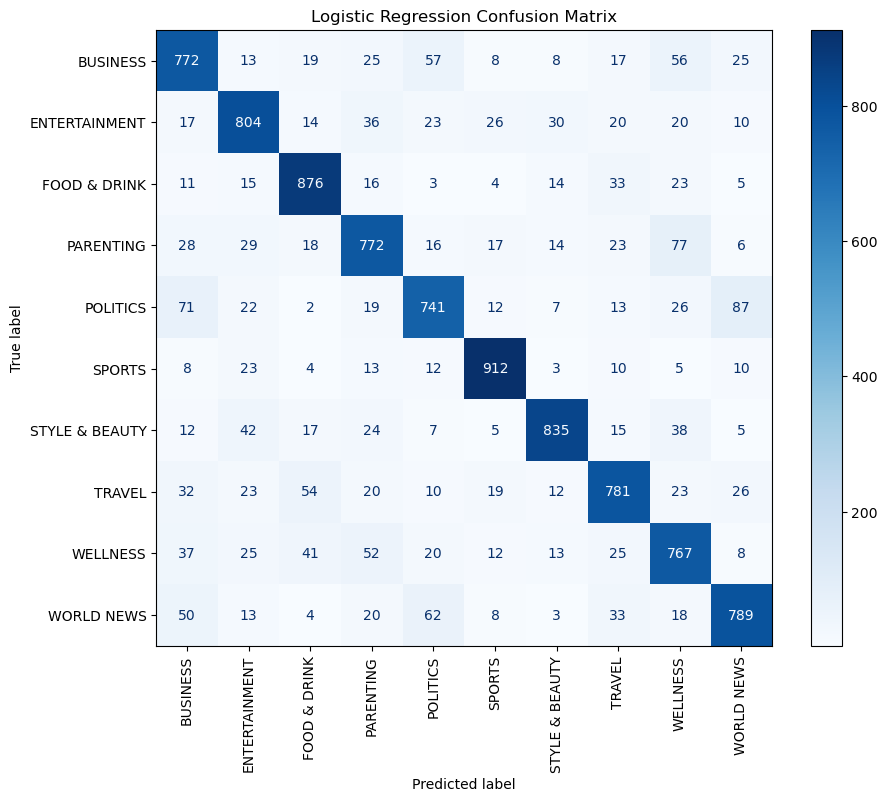


--- Multinomial Naive Bayes Evaluation ---
Accuracy: 0.8006
Precision (macro avg): 0.8028
Recall (macro avg): 0.8006
F1-Score (macro avg): 0.8009


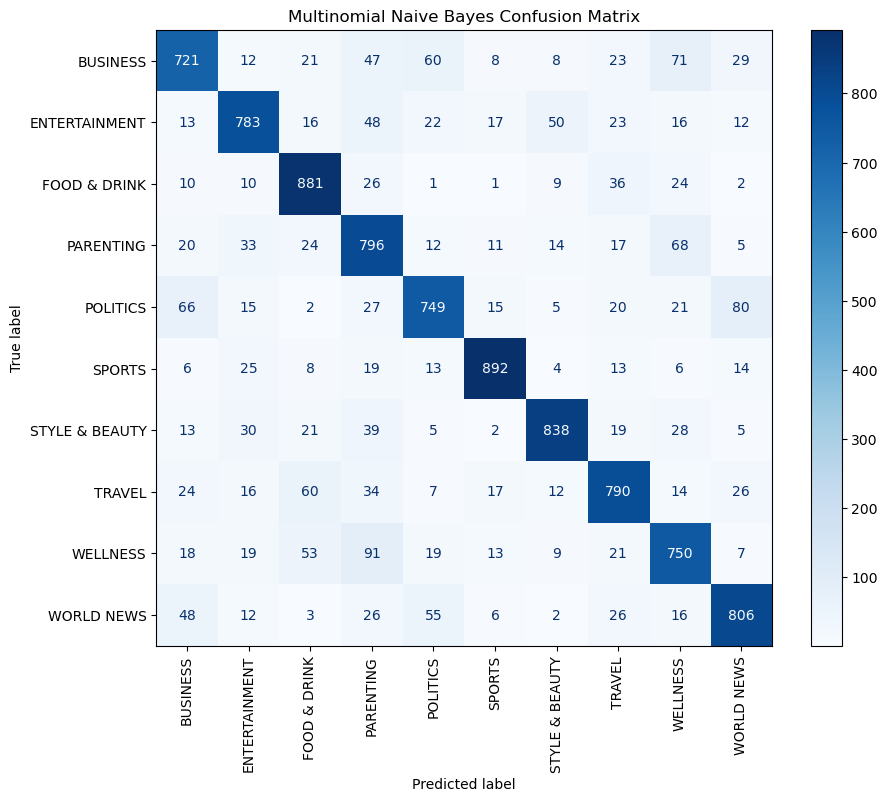

In [22]:
# Evaluate Logistic Regression
print("\n--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
# For multi-class, precision/recall/f1-score need 'average' parameter
print(f"Precision (macro avg): {precision_score(y_test, lr_predictions, average='macro'):.4f}")
print(f"Recall (macro avg): {recall_score(y_test, lr_predictions, average='macro'):.4f}")
print(f"F1-Score (macro avg): {f1_score(y_test, lr_predictions, average='macro'):.4f}")

# Confusion Matrix for Logistic Regression
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()

# Evaluate Multinomial Naive Bayes
print("\n--- Multinomial Naive Bayes Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, nb_predictions):.4f}")
print(f"Precision (macro avg): {precision_score(y_test, nb_predictions, average='macro'):.4f}")
print(f"Recall (macro avg): {recall_score(y_test, nb_predictions, average='macro'):.4f}")
print(f"F1-Score (macro avg): {f1_score(y_test, nb_predictions, average='macro'):.4f}")

# Confusion Matrix for Multinomial Naive Bayes
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.set_title('Multinomial Naive Bayes Confusion Matrix')
plt.show()

## 7. News Article Classification Function
A utility function to classify new, unseen news articles into their respective categories.

In [25]:
def classify_news(new_article_text, model, vectorizer):
    # Preprocess the new article
    cleaned_article = preprocess_text_news(new_article_text)
    # Transform the article using the trained TF-IDF vectorizer
    transformed_article = vectorizer.transform([cleaned_article])
    # Make prediction
    predicted_category = model.predict(transformed_article)[0]
    return predicted_category

# Example usage:
article1 = "Novak Djokovic wins another grand slam title, extending his record."
article2 = "New policy proposals aim to boost economic growth and reduce inflation."

print(f"\nArticle: '{article1}'\nPredicted Category: {classify_news(article1, lr_model, tfidf_vectorizer)}")
print(f"\nArticle: '{article2}'\nPredicted Category: {classify_news(article2, lr_model, tfidf_vectorizer)}")


Article: 'Novak Djokovic wins another grand slam title, extending his record.'
Predicted Category: SPORTS

Article: 'New policy proposals aim to boost economic growth and reduce inflation.'
Predicted Category: BUSINESS


## 8. Conclusion and Future Work for News Article Classification
Here's the conclusion for our News Article Classification project, written in simple words:

### Conclusion:

In this project, we successfully built computer models to sort news articles into different groups, like sports or politics.

First, we got our news article data and cleaned it up. This meant taking out parts we didn't need and putting the important words from the headlines and descriptions together. We also made sure all the text was clean by making letters small, taking out odd symbols, and removing common words like "the" or "a." This made the text ready for our models.

Then, we changed the cleaned text into numbers using TF-IDF. This helps the computer understand the words in the articles.

After that, we used two types of models, Logistic Regression and Naive Bayes. We trained these models to learn how to sort the articles into the right groups.

Finally, we checked how good our models were. We looked at scores like accuracy (how many articles they sorted correctly), precision, recall, and F1-score. We also used a "confusion matrix" which is a table that shows us if the models got confused between different news groups. Our models did a good job overall, showing that they can help sort news articles.

# Video Link
https://drive.google.com/file/d/1Qz7azJIXwg5ou8It_Rj_-G0cw2enB9ZL/view?usp=drivesdk